In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow as tf
print(f'tf={tf.__version__}')
from tensorflow import keras
print(f'keras={keras.__version__}')
def solve_cudnn_error():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)
solve_cudnn_error()

tf=2.3.0
keras=2.4.0
1 Physical GPUs, 1 Logical GPUs


In [3]:
import os  # 處理字串路徑
import glob  # 查詢檔案
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import *
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
import itertools
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [5]:
train_path = 'CIFAR10/train'
valid_path = 'CIFAR10/test'
test_path = 'CIFAR10/test'

In [6]:
train_datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
)

In [7]:
train_batches = train_datagen.flow_from_directory(train_path, target_size=(32,32), 
                                                         classes=['airplane',
                                                                  'automobile',
                                                                  'bird',
                                                                  'cat',
                                                                  'deer',
                                                                  'dog',
                                                                  'frog',
                                                                  'horse',
                                                                  'ship',
                                                                  'truck'], batch_size=4)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(32,32), 
                                                         classes=['airplane',
                                                                  'automobile',
                                                                  'bird',
                                                                  'cat',
                                                                  'deer',
                                                                  'dog',
                                                                  'frog',
                                                                  'horse',
                                                                  'ship',
                                                                  'truck'], batch_size=4)
# test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(32,32), 
#                                                         classes=['airplane',
#                                                                   'automobile',
#                                                                   'bird',
#                                                                   'cat',
#                                                                   'deer',
#                                                                   'dog',
#                                                                   'frog',
#                                                                   'horse',
#                                                                   'ship',
#                                                                   'truck'], batch_size=4)

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [8]:
model = Sequential(name='VGG16')
model.add(Convolution2D(64,(3, 3), activation='relu',name='block1_conv1',padding='same',input_shape=(32, 32, 3)))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64,(3, 3), activation='relu',name='block1_conv2',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128,(3, 3), activation='relu',name='block2_conv1',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128,(3, 3), activation='relu',name='block2_conv2',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256,(3, 3), activation='relu',name='block3_conv1',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256,(3, 3), activation='relu',name='block3_conv2',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256,(3, 3), activation='relu',name='block3_conv3',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# # model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512,(3, 3), activation='relu',name='block4_conv1',padding='same'))
# # model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512,(3, 3), activation='relu',name='block4_conv2',padding='same'))
# # model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512,(3, 3), activation='relu',name='block4_conv3',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512,(3, 3), activation='relu',name='block5_conv1',padding='same'))
# # model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512,(3, 3), activation='relu',name='block5_conv2',padding='same'))
# # model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512,(3, 3), activation='relu',name='block5_conv3',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu',name='fc1'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu',name='fc2'))
model.add(Dropout(0.5))
# model.add(Dense(1000, activation='relu',name='fc3'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax',name='predictions'))
model.summary()

Model: "VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         295168

In [9]:
model.compile(Adam(lr=.00002), loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
#sgd = SGD(lr=.00002122, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,
                           generator=train_batches, 
                           validation_data= valid_batches, 
                           validation_steps=100,
                           epochs=100,
#                            callbacks=[checkpoint,early],
                           verbose=2)
model.save('my_model.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 - 3s - loss: 5.1187 - accuracy: 0.1100 - f1_m: 0.0940 - precision_m: 0.1292 - recall_m: 0.0800 - val_loss: 2.2328 - val_accuracy: 0.1750 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/100
100/100 - 3s - loss: 2.7096 - accuracy: 0.1425 - f1_m: 0.0322 - precision_m: 0.0633 - recall_m: 0.0225 - val_loss: 2.2068 - val_accuracy: 0.1575 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/100
100/100 - 3s - loss: 2.3577 - accuracy: 0.1850 - f1_m: 0.0300 - precision_m: 0.0650 - recall_m: 0.0200 - val_loss: 2.1284 - val_accuracy: 0.2025 - val_f1_m: 0.0040 - val_precision_m: 0.0100 - val_recall_m: 0.0025
Epoch 4/100
100/100 - 2s - loss: 2.3461 - accuracy: 0.1675 - f1_m: 0.0040 - precision_m: 0.0100 - recall_m: 0.0025 - val_loss: 2.0580 - val_accuracy: 0.2600 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m:

Epoch 35/100
100/100 - 2s - loss: 1.7728 - accuracy: 0.3625 - f1_m: 0.1033 - precision_m: 0.2350 - recall_m: 0.0675 - val_loss: 1.5799 - val_accuracy: 0.4325 - val_f1_m: 0.1288 - val_precision_m: 0.2933 - val_recall_m: 0.0850
Epoch 36/100
100/100 - 2s - loss: 1.7018 - accuracy: 0.3700 - f1_m: 0.1646 - precision_m: 0.3600 - recall_m: 0.1100 - val_loss: 1.5860 - val_accuracy: 0.4175 - val_f1_m: 0.2054 - val_precision_m: 0.4283 - val_recall_m: 0.1400
Epoch 37/100
100/100 - 2s - loss: 1.7549 - accuracy: 0.3425 - f1_m: 0.1183 - precision_m: 0.2367 - recall_m: 0.0825 - val_loss: 1.7638 - val_accuracy: 0.3550 - val_f1_m: 0.1907 - val_precision_m: 0.4100 - val_recall_m: 0.1275
Epoch 38/100
100/100 - 2s - loss: 1.6084 - accuracy: 0.3975 - f1_m: 0.2248 - precision_m: 0.4467 - recall_m: 0.1575 - val_loss: 1.6071 - val_accuracy: 0.4625 - val_f1_m: 0.1910 - val_precision_m: 0.4167 - val_recall_m: 0.1275
Epoch 39/100
100/100 - 2s - loss: 1.6855 - accuracy: 0.3950 - f1_m: 0.1888 - precision_m: 0.3483

KeyboardInterrupt: 

In [97]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

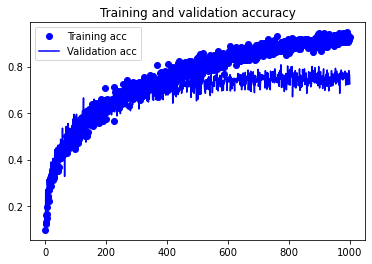

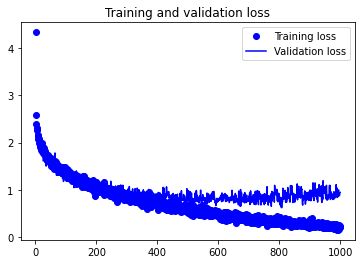

In [98]:
plot_accuracy_and_loss(hist)

In [99]:
loss, accuracy, f1_score, precision, recall = model.evaluate_generator(generator=valid_batches,verbose=1)

2500/2500 [==============================] - 7s 3ms/step - loss: 0.9080 - accuracy: 0.7572 - f1_m: 0.7578 - precision_m: 0.7858 - recall_m: 0.7380


In [ ]:
# cls_list = ['dogs', 'cats']
# img = Image.open('train/cat.8439.jpg')
# arr = np.asarray(img, dtype="float32")
# arr.resize((1,224,224,3))
# predict = model.predict_classes(arr)[0]
# print ('識別爲：')
# print (f'predict={predict} class={cls_list[predict]}')
# plt.imshow(img)
# plt.show

In [11]:
from numba import cuda
cuda.select_device(0)
cuda.close()